In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sys
sys.path.append("../ProcessModelResults/")
from my_functions import *

In [3]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [4]:
methods_key ='Observed'
catchment_name = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/Model_{}Profiles_export/'.format(catchment_name, methods_key)

In [5]:
sys.path.append("../")
from my_functions import *

if catchment_name == 'LinDyke':
    catchment_name_str = "Resampled.Terrain" 
    catchment_shpfilename = 'CatchmentLinDyke_exported'
    minx, miny, maxx, maxy  = 437000,  426500,  445500, 434300
    catchment_gdf = gpd.read_file(model_directory + 'CatchmentLinDyke_exported.shp')
    
elif catchment_name == 'WykeBeck':
    catchment_name_str = "Terrain.wykeDEM" 
    catchment_shpfilename = 'WykeBeckCatchment'
    minx, miny, maxx, maxy = 430004,  429978, 438660, 440996
    catchment_gdf = gpd.read_file(model_directory + 'WykeBeckCatchment.shp')
    
# Create a bounding box (this is used in preparing the rasters)
bbox = box(minx, miny, maxx, maxy)

In [6]:
landcover_directory = '../../../FloodModelling/{}Models/LandCoverData/'.format(catchment_name)
# Water landcover classification - 10 is water, 11 is eveyrthing else
with rasterio.open(landcover_directory + 'LandCover_notwater_classification.tif', 'r') as ds:
    landcover_notwater = ds.read()[0]
    out_meta = ds.meta

In [7]:
# fig,ax=plt.subplots()
# geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=CRS('EPSG:27700'))     
# # Re-project into the same coordinate system as the raster data
# geo = geo.to_crs(crs=CRS('EPSG:27700'))#data.crs.data
# geo.plot(ax=ax,color='White', edgecolor='black')
# catchment_gdf.plot(ax=ax, facecolor=None)

In [16]:
# Create dictionaries to store results for each method
n_flooded_cells_dict = {}
n_flooded_cells_dict_over10cm = {}
n_flooded_cells_dict_notwater = {}

# Loop through methods
for method in methods_dict['Observed']:
    print(method)
    
    # Create lists to store the values for each timeslice for this method
    n_flooded_cells = []
    n_flooded_cells_over10cm = []
    n_flooded_cells_notwater = []
    dates = []
    
    # List of all the Hours and Minutes that we need
    # Hs=range(0,12)
    Ms= range(0,60,10)
    Hs_dict = {1:range(12,24,1), 2: range(0,24,1), 3: range(0,24,1), 4: range(0,12,1)}
    
    # Loop through each timeslice
    for D in range(1,5,1):
        print(D)
        Hs = Hs_dict[D]
        for H in Hs:
            H = str(H).zfill(2)
            for M in Ms:
                M = str(M).zfill(2)
                dates.append('{} {}'.format(H,M))

                if methods_key == 'Observed' and method == '6h_feh_singlepeak':
                    fp = '../../../FloodModelling/{}Models/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (0{}AUG2022 {} {} 00).Resampled.Terrain.tif'.format(catchment_name, D, H, M)
                else:
                    fp = model_directory + '{}/Depth (0{}AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, D, H, M)

                # To not crash the script if this timeslice's data isnt downloaded
                try:
                    f = open(fp)

                except:
                    print(fp)

6h_feh_singlepeak
1
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (01AUG2022 12 00 00).Resampled.Terrain.tif
2
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_fe

../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03AUG2022 08 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03AUG2022 08 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03AUG2022 08 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03AUG2022 08 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03AUG2022 08 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03AUG2022 09 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03AUG2022 09 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (03

2
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 00 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 13 10 00).Resampled.Terrain.tif
../../../Flood

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (03AUG2022 13 20 00).Resampled.Terrain.tif
../../../FloodMo

2
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (02AUG2022 13 20 00).Resampled.Terrain.tif
../../../Flood

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 04 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 04 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 04 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 04 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 04 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 05 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 05 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 05 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 18 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 18 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 18 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 18 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 18 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 19 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 19 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (03AUG2022 19 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 10 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 10 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 10 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 10 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 10 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 11 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 11 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c2/Depth (04AUG2022 11 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 20 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 20 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 20 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 20 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 20 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 21 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 21 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (03AUG2022 21 20 00).Resampled.Terrain.tif
../../../FloodMo

2
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 13 20 00).Resampled.Terrain.tif
../../../Flood

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (03AUG2022 13 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 08 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 08 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 08 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 08 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 08 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 09 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 09 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (04AUG2022 09 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 04 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 04 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 04 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 04 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 04 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 05 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 05 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (03AUG2022 05 20 00).Resampled.Terrain.tif
../../../FloodMo

2
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (02AUG2022 13 20 00).Resampled.Terrain.tif
../../../Flood

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 06 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 06 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 06 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 06 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 06 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 07 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 07 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (03AUG2022 07 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 04 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 04 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 04 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 04 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 04 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 05 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 05 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c6/Depth (04AUG2022 05 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 22 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 22 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 22 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 22 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 22 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 23 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 23 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 23 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (03AUG2022 13 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 06 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 06 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 06 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 06 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 06 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 07 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 07 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (04AUG2022 07 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 06 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 06 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 06 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 06 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 06 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 07 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 07 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (03AUG2022 07 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 06 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 06 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 06 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 06 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 06 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 07 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 07 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c8/Depth (04AUG2022 07 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 00 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 00 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 00 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 00 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 00 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 01 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 01 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 01 20 00).Resampled.Terrain.tif
../../../FloodMo

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 18 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 18 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 18 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 18 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 18 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 19 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 19 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c9/Depth (03AUG2022 19 20 00).Resampled.Terrain.tif
../../../FloodMo

2
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 13 20 00).Resampled.Terrain.tif
../../

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 02 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 02 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 02 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 02 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 02 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 03 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 03 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (03AUG2022 03 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 04 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 04 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 04 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 04 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 04 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 05 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 05 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (04AUG2022 05 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (03AUG2022 13 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 08 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 08 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 08 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 08 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 08 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 09 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 09 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c11/Depth (04AUG2022 09 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 04 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 04 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 04 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 04 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 04 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 05 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 05 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (03AUG2022 05 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 00 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 00 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 00 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 00 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 00 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 01 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 01 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (04AUG2022 01 20 00).Resampled.Terrain.tif
../../..

2
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 13 20 00).Resampled.Terrain.tif
../../

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 02 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 02 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 02 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 02 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 02 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 03 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 03 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (03AUG2022 03 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 04 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 04 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 04 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 04 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 04 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 05 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 05 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (04AUG2022 05 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 02 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 02 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 02 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 02 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 02 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 03 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 03 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 03 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 16 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 16 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 16 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 16 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 16 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 17 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 17 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (03AUG2022 17 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 10 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 10 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 10 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 10 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 10 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 11 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 11 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c14/Depth (04AUG2022 11 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 22 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 22 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 22 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 22 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 22 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 23 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 23 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (02AUG2022 23 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 12 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 12 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 13 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 13 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (03AUG2022 13 20 00).Resampled.Terrain.tif
../../..

../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 02 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 02 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 02 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 02 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 02 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 03 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 03 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c15/Depth (04AUG2022 03 20 00).Resampled.Terrain.tif
../../..

In [ ]:
# Create dictionaries to store results for each method
n_flooded_cells_dict = {}
n_flooded_cells_dict_over10cm = {}
n_flooded_cells_dict_notwater = {}

# Loop through methods
for method in methods_dict['Observed']:
    print(method)
    
    # Create lists to store the values for each timeslice for this method
    n_flooded_cells = []
    n_flooded_cells_over10cm = []
    n_flooded_cells_notwater = []
    dates = []
    
    # List of all the Hours and Minutes that we need
    Hs=range(0,12)
    Ms= range(0,60,10)

    # Loop through each timeslice
    for H in Hs:
        for M in Ms:
            H = str(H).zfill(2)
            M = str(M).zfill(2)
            dates.append('{} {}'.format(H,M))
            # Make fp
            if methods_key == 'Observed' and method == '6h_feh_singlepeak':
                fp = '../../../FloodModelling/{}Models/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 {} {} 00).Resampled.Terrain.tif'.format(catchment_name, H, M)
            else:
                fp = model_directory + '{}/Depth (02AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
            
            
            # To not crash the script if this timeslice's data isnt downloaded
            try:
                ###################################
                # Get the number of cells with flooding >0.1m
                ###################################
                # Get the data for this timeslice
                depth_timeslice, out_meta = open_and_clip_to_catchment(fp, catchment_gdf, crop_or_not = True)
                number_flooded_cells = depth_timeslice[depth_timeslice>0].size
                n_flooded_cells_10mins.append(number_flooded_cells)

                # Remove values <0.1m
                depth_timeslice = remove_little_values_fxn(depth_timeslice, fp, catchment_gdf, True)   
                # Count the number of flooded cells (shouldnt need the filter by 0.1 as already done)
                number_flooded_cells_over10cm = depth_timeslice[depth_timeslice>0.1].size
                # Add values to list
                n_flooded_cells_10mins_over10cm.append(number_flooded_cells_over10cm)

                ###################################
                # Get the number of cells with flooding >0.1m which aren't areas or permanent water
                ###################################
                depth_timeslice_and_landcover = pd.DataFrame({'landcovercategory':  landcover_notwater.flatten(),
                                                              'counts': depth_timeslice.flatten()})
                # Keep just the rows in the relevant landcoverclass
                df = depth_timeslice_and_landcover[depth_timeslice_and_landcover['landcovercategory']==10].copy()  
                # remove the NA values (i.e. where there is no flooding)
                df=df[df.counts.notnull()]
                # Count number of flooded cells which aren't water
                number_flooded_cells_not_water = len(df)
                # Add values to list
                n_flooded_cells_10mins_notwater.append(number_flooded_cells_not_water)
                
            except:
                print(fp)

6h_feh_singlepeak


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 01 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_FEHProfiles_export/6h_feh_singlepeak/Depth (02AUG2022 01 40 00).Resampled.Terrain.tif
6h_c1


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 08 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c1/Depth (02AUG2022 08 50 00).Resampled.Terrain.tif
6h_c2
6h_c3


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (02AUG2022 04 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c3/Depth (02AUG2022 05 00 00).Resampled.Terrain.tif
6h_c4


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 09 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c4/Depth (02AUG2022 09 40 00).Resampled.Terrain.tif
6h_c5


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (02AUG2022 09 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (02AUG2022 09 30 00).Resampled.Terrain.tif


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (02AUG2022 10 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c5/Depth (02AUG2022 10 30 00).Resampled.Terrain.tif
6h_c6
6h_c7


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 01 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c7/Depth (02AUG2022 01 50 00).Resampled.Terrain.tif
6h_c8
6h_c9
6h_c10


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 00 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 00 50 00).Resampled.Terrain.tif


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 07 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c10/Depth (02AUG2022 07 30 00).Resampled.Terrain.tif
6h_c11
6h_c12


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c12/Depth (02AUG2022 08 50 00).Resampled.Terrain.tif
6h_c13
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 06 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 06 40 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 06 50 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 07 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 07 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 07 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 07 30 00).Resampled.Terrain.tif
.

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 09 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 09 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 09 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_ObservedProfiles_export/6h_c13/Depth (02AUG2022 09 40 00).Resampled.Terrain.tif


In [25]:
df_10mins_allvalues = pd.DataFrame(n_flooded_cells_dict_10mins)
df_10mins_over10cm = pd.DataFrame(n_flooded_cells_dict_10mins_over10cm)
df_10mins_notwater = pd.DataFrame(n_flooded_cells_dict_10mins_notwater)

In [27]:
n_flooded_cells_dict_10mins

{}

In [4]:
df_2mins_allvalues = df_2mins_allvalues/1000000
df_5mins_allvalues = df_5mins_allvalues/1000000
df_test_allvalues = df_test_allvalues/1000000


In [5]:
df_2mins_allvalues['minute']= list(range(1,len(df_2mins_allvalues)*2,2))
df_5mins_allvalues['minute']= list(range(0,len(df_5mins_allvalues)*5,5))
df_test_allvalues['minute']= list(range(720,(len(df_test_allvalues)*60)+720,60))


In [7]:
df_2mins_allvalues  =pd.read_csv("Data/FloodedAreaOverTime/df_2mins_allvalues.csv")
df_5mins_allvalues  =pd.read_csv("Data/FloodedAreaOverTime/df_5mins_allvalues.csv")
df_test_allvalues  =pd.read_csv("Data/FloodedAreaOverTime/df_test_allvalues.csv")


In [8]:
df_test_allvalues# * 1000000 * 1000000

,6h_sp_fl_0.1,6h_sp_fl_0.2,6h_sp_fl_0.3,6h_sp_fl_0.4,6h_sp_c_0.5,6h_sp_bl_0.6,6h_sp_bl_0.7,6h_sp_bl_0.8,6h_sp_bl_0.9,minute
0,1.960573,1.960813,1.961654,1.962600,1.963410,1.965615,1.966792,1.970613,1.974376,720
1,1.945467,1.945187,1.945975,1.947627,1.948364,1.948298,1.949865,1.951323,1.956003,780
2,1.934382,1.934949,1.934469,1.935812,1.937692,1.937976,1.938978,1.940125,1.942544,840
3,1.923503,1.924590,1.925435,1.926596,1.926679,1.929282,1.929107,1.930615,1.932509,900
4,1.914054,1.914590,1.914398,1.915297,1.916179,1.919037,1.919920,1.920877,1.923395,960
5,1.907938,1.907584,1.907457,1.907978,1.908306,1.909353,1.909861,1.910531,1.913568,1020
6,1.902883,1.903393,1.902910,1.903536,1.902089,1.903017,1.903362,1.904429,1.906498,1080
7,1.896918,1.897394,1.896965,1.897734,1.898033,1.898433,1.898752,1.898097,1.900062,1140
8,1.892840,1.892756,1.892989,1.893694,1.893801,1.894617,1.894816,1.895332,1.896342,1200
9,1.889565,1.890145,1.889868,1.890027,1.889926,1.890906,1.891377,1.891993,1.892471,1260


In [12]:
df_test_over10cm * 1000000 * 1000000

,6h_sp_fl_0.1,6h_sp_fl_0.2,6h_sp_fl_0.3,6h_sp_fl_0.4,6h_sp_c_0.5,6h_sp_bl_0.6,6h_sp_bl_0.7,6h_sp_bl_0.8,6h_sp_bl_0.9,minute
0,1.960573,1.960813,1.961654,1.962600,1.963410,1.965615,1.966792,1.970613,1.974376,720000000000000
1,1.945467,1.945187,1.945975,1.947627,1.948364,1.948298,1.949865,1.951323,1.956003,780000000000000
2,1.934382,1.934949,1.934469,1.935812,1.937692,1.937976,1.938978,1.940125,1.942544,840000000000000
3,1.923503,1.924590,1.925435,1.926596,1.926679,1.929282,1.929107,1.930615,1.932509,900000000000000
4,1.914054,1.914590,1.914398,1.915297,1.916179,1.919037,1.919920,1.920877,1.923395,960000000000000
5,1.907938,1.907584,1.907457,1.907978,1.908306,1.909353,1.909861,1.910531,1.913568,1020000000000000
6,1.902883,1.903393,1.902910,1.903536,1.902089,1.903017,1.903362,1.904429,1.906498,1080000000000000
7,1.896918,1.897394,1.896965,1.897734,1.898033,1.898433,1.898752,1.898097,1.900062,1140000000000000
8,1.892840,1.892756,1.892989,1.893694,1.893801,1.894617,1.894816,1.895332,1.896342,1200000000000000
9,1.889565,1.890145,1.889868,1.890027,1.889926,1.890906,1.891377,1.891993,1.892471,1260000000000000


In [10]:
df_2mins_notwater * 1000000 * 1000000

,6h_sp_bl_0.6,6h_sp_bl_0.9,minute
0,0.000000,0.000000,1000000000000
1,0.047812,0.047673,3000000000000
2,0.057460,0.057265,5000000000000
3,0.063565,0.063412,7000000000000
4,0.068528,0.068194,9000000000000
...,...,...,...
355,0.677554,0.683534,711000000000000
356,0.678631,0.683128,713000000000000
357,0.678045,0.682699,715000000000000
358,0.677223,0.682351,717000000000000


In [17]:
df_5mins_allvalues

,6h_sp_fl_0.1,6h_sp_fl_0.2,6h_sp_fl_0.3,6h_sp_fl_0.4,6h_sp_c_0.5,6h_sp_bl_0.7,6h_sp_bl_0.8,minute
0,0.267867,0.255247,0.251059,0.249219,0.248179,0.246906,0.246576,0
1,0.705482,0.355648,0.346421,0.342117,0.339858,0.337102,0.336377,5
2,0.484501,0.437030,0.422573,0.415708,0.411642,0.407337,0.406033,10
3,0.569492,0.503300,0.482674,0.474430,0.468589,0.462001,0.460239,15
4,0.651017,0.556828,0.532086,0.520481,0.513305,0.506298,0.503603,20
...,...,...,...,...,...,...,...,...
138,1.967388,1.967503,1.968199,1.970643,1.970970,1.975396,1.978366,690
139,1.965606,1.966377,1.966722,1.968329,1.969835,1.974239,1.976425,695
140,1.964535,1.965012,1.965516,1.966293,1.968053,1.972042,1.974772,700
141,1.963582,1.963701,1.964210,1.964632,1.966388,1.970150,1.973265,705


In [11]:
df_test_allvalues

,6h_sp_fl_0.1,6h_sp_fl_0.2,6h_sp_fl_0.3,6h_sp_fl_0.4,6h_sp_c_0.5,6h_sp_bl_0.6,6h_sp_bl_0.7,6h_sp_bl_0.8,6h_sp_bl_0.9,minute
0,1.960573,1.960813,1.961654,1.962600,1.963410,1.965615,1.966792,1.970613,1.974376,720
1,1.945467,1.945187,1.945975,1.947627,1.948364,1.948298,1.949865,1.951323,1.956003,780
2,1.934382,1.934949,1.934469,1.935812,1.937692,1.937976,1.938978,1.940125,1.942544,840
3,1.923503,1.924590,1.925435,1.926596,1.926679,1.929282,1.929107,1.930615,1.932509,900
4,1.914054,1.914590,1.914398,1.915297,1.916179,1.919037,1.919920,1.920877,1.923395,960
5,1.907938,1.907584,1.907457,1.907978,1.908306,1.909353,1.909861,1.910531,1.913568,1020
6,1.902883,1.903393,1.902910,1.903536,1.902089,1.903017,1.903362,1.904429,1.906498,1080
7,1.896918,1.897394,1.896965,1.897734,1.898033,1.898433,1.898752,1.898097,1.900062,1140
8,1.892840,1.892756,1.892989,1.893694,1.893801,1.894617,1.894816,1.895332,1.896342,1200
9,1.889565,1.890145,1.889868,1.890027,1.889926,1.890906,1.891377,1.891993,1.892471,1260


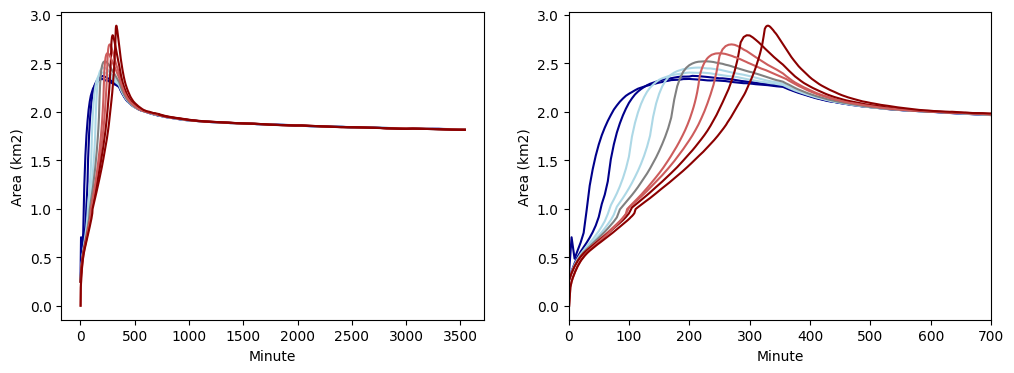

In [12]:
fig, ax = plt.subplots(ncols=2, figsize= (12,4))

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

for number, column in enumerate(df_5mins_allvalues.columns[:-1]):
      ax[0].plot(df_5mins_allvalues["minute"], df_5mins_allvalues[column], color = colors_5mins[number]);           
        
for number, column in enumerate(df_2mins_allvalues.columns[:-1]):
      ax[0].plot(df_2mins_allvalues["minute"], df_2mins_allvalues[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_allvalues.columns[:-1]):
      ax[0].plot(df_test_allvalues["minute"], df_test_allvalues[column], color = colors_test[number]);    
        
        
for number, column in enumerate(df_5mins_allvalues.columns[:-1]):
      ax[1].plot(df_5mins_allvalues["minute"], df_5mins_allvalues[column], color = colors_5mins[number])
        
for number, column in enumerate(df_2mins_allvalues.columns[:-1]):
      ax[1].plot(df_2mins_allvalues["minute"], df_2mins_allvalues[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_allvalues.columns[:-1]):
      ax[1].plot(df_test_allvalues["minute"], df_test_allvalues[column], color = colors_test[number]);     
        
ax[1].set_xlim(0,700)
ax[0].set_ylabel('Area (km2)')
ax[1].set_ylabel('Area (km2)')
ax[0].set_xlabel('Minute')
ax[1].set_xlabel('Minute');     

# fig.savefig("ProcessModelResults/Outputs/Figs/FloodedArea_OverTime.PNG")

### Not including areas of permanent water

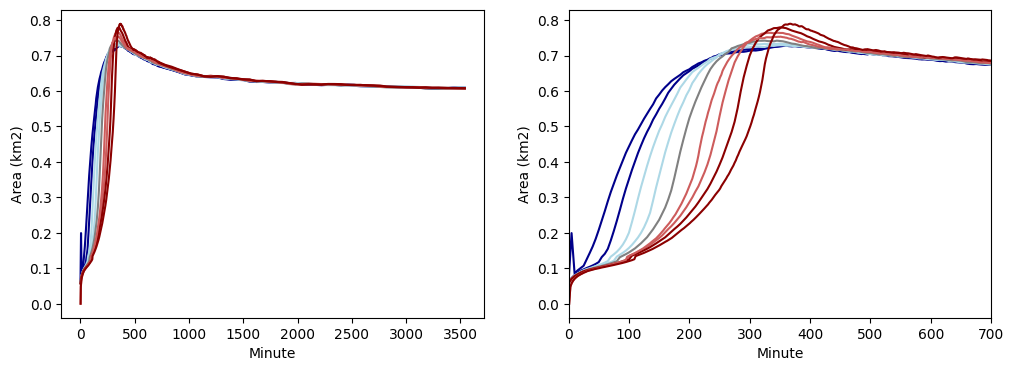

In [71]:
fig, ax = plt.subplots(ncols=2, figsize= (12,4))

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

for number, column in enumerate(df_5mins_notwater.columns[:-1]):
      ax[0].plot(df_5mins_notwater["minute"], df_5mins_notwater[column], color = colors_5mins[number]);           
        
for number, column in enumerate(df_2mins_notwater.columns[:-1]):
      ax[0].plot(df_2mins_notwater["minute"], df_2mins_notwater[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_notwater.columns[:-1]):
      ax[0].plot(df_test_notwater["minute"], df_test_notwater[column], color = colors_test[number]);    
        
        
for number, column in enumerate(df_5mins_notwater.columns[:-1]):
      ax[1].plot(df_5mins_notwater["minute"], df_5mins_notwater[column], color = colors_5mins[number])
        
for number, column in enumerate(df_2mins_notwater.columns[:-1]):
      ax[1].plot(df_2mins_notwater["minute"], df_2mins_notwater[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_notwater.columns[:-1]):
      ax[1].plot(df_test_notwater["minute"], df_test_notwater[column], color = colors_test[number]);     
        
ax[1].set_xlim(0,700)
ax[0].set_ylabel('Area (km2)')
ax[1].set_ylabel('Area (km2)')
ax[0].set_xlabel('Minute')
ax[1].set_xlabel('Minute');     

# fig.savefig("ProcessModelResults/Outputs/Figs/FloodedArea_OverTime.PNG")

### Only including cells over 10cm

In [13]:
df_5mins_over10cm

,6h_sp_fl_0.1,6h_sp_fl_0.2,6h_sp_fl_0.3,6h_sp_fl_0.4,6h_sp_c_0.5,6h_sp_bl_0.7,6h_sp_bl_0.8,minute
0,2.678670e-13,2.552470e-13,2.510590e-13,2.492190e-13,2.481790e-13,2.469060e-13,2.465760e-13,0
1,7.054820e-13,3.556480e-13,3.464210e-13,3.421170e-13,3.398580e-13,3.371020e-13,3.363770e-13,5
2,4.845010e-13,4.370300e-13,4.225730e-13,4.157080e-13,4.116420e-13,4.073370e-13,4.060330e-13,10
3,5.694920e-13,5.033000e-13,4.826740e-13,4.744300e-13,4.685890e-13,4.620010e-13,4.602390e-13,15
4,6.510170e-13,5.568280e-13,5.320860e-13,5.204810e-13,5.133050e-13,5.062980e-13,5.036030e-13,20
...,...,...,...,...,...,...,...,...
138,1.967388e-12,1.967503e-12,1.968199e-12,1.970643e-12,1.970970e-12,1.975396e-12,1.978366e-12,690
139,1.965606e-12,1.966377e-12,1.966722e-12,1.968329e-12,1.969835e-12,1.974239e-12,1.976425e-12,695
140,1.964535e-12,1.965012e-12,1.965516e-12,1.966293e-12,1.968053e-12,1.972042e-12,1.974772e-12,700
141,1.963582e-12,1.963701e-12,1.964210e-12,1.964632e-12,1.966388e-12,1.970150e-12,1.973265e-12,705


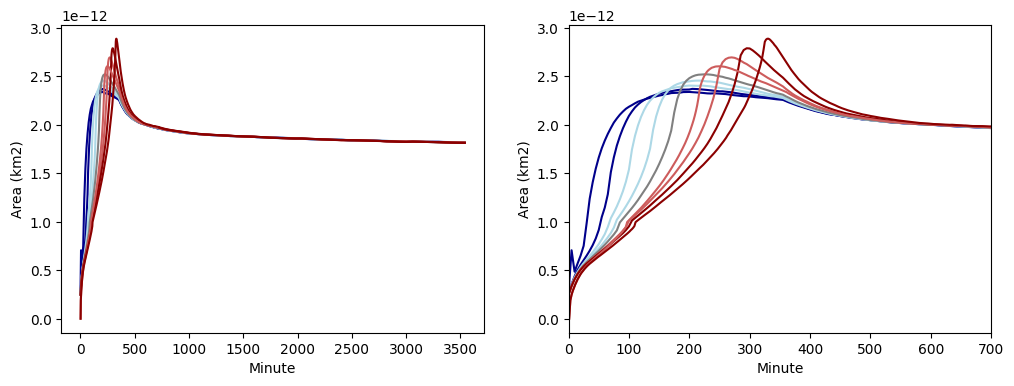

In [15]:
fig, ax = plt.subplots(ncols=2, figsize= (12,4))

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

for number, column in enumerate(df_5mins_over10cm.columns[:-1]):
      ax[0].plot(df_5mins_over10cm["minute"], df_5mins_over10cm[column], color = colors_5mins[number]);           
        
for number, column in enumerate(df_2mins_over10cm.columns[:-1]):
      ax[0].plot(df_2mins_over10cm["minute"], df_2mins_over10cm[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_over10cm.columns[:-1]):
      ax[0].plot(df_test_over10cm["minute"], df_test_over10cm[column], color = colors_test[number]);    
        
        
for number, column in enumerate(df_5mins_over10cm.columns[:-1]):
      ax[1].plot(df_5mins_over10cm["minute"], df_5mins_over10cm[column], color = colors_5mins[number])
        
for number, column in enumerate(df_2mins_over10cm.columns[:-1]):
      ax[1].plot(df_2mins_over10cm["minute"], df_2mins_over10cm[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_over10cm.columns[:-1]):
      ax[1].plot(df_test_over10cm["minute"], df_test_over10cm[column], color = colors_test[number]);     
        
ax[1].set_xlim(0,700)
ax[0].set_ylabel('Area (km2)')
ax[1].set_ylabel('Area (km2)')
ax[0].set_xlabel('Minute')
ax[1].set_xlabel('Minute');     

# fig.savefig("ProcessModelResults/Outputs/Figs/FloodedArea_OverTime.PNG")